In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline

In [6]:
raw = pd.read_csv("부품수리시간.csv")

In [7]:
raw.head(5)

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [8]:
raw.describe().round(3)

,UNITS,MINUTES
count,14.000,14.000
mean,6.000,97.214
std,2.961,46.217
min,1.000,23.000
25%,4.000,66.500
50%,6.000,96.500
75%,8.750,138.500
max,10.000,166.000


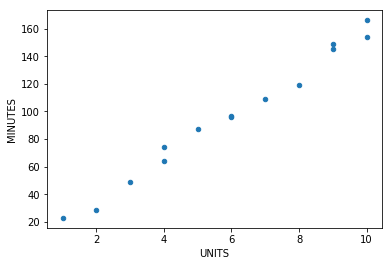

In [10]:
raw.plot.scatter(x = "UNITS", y = "MINUTES")

In [12]:
raw.corr(method="pearson").round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


In [13]:
reg_model = smf.ols(formula = "MINUTES ~ UNITS", data = raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           8.92e-13
Time:                        10:08:02   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


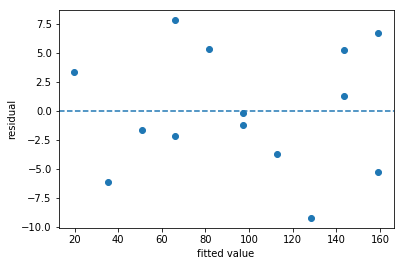

In [14]:
# 등분산성/독립성 검정
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value");plt.ylabel("residual")
plt.axhline(y=0, linestyle="--")

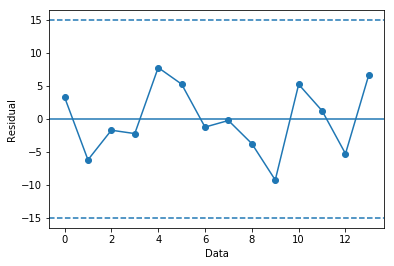

In [31]:
plt.plot(raw.index, reg_result.resid, marker="o")
plt.xlabel("Data");plt.ylabel("Residual")
plt.axhline(y=0, linestyle="-")
plt.axhline(y=3*np.std(reg_result.resid), linestyle="--")
plt.axhline(y=-3*np.std(reg_result.resid), linestyle="--")

/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=0.746448218273468, pvalue=0.6885109139659057)

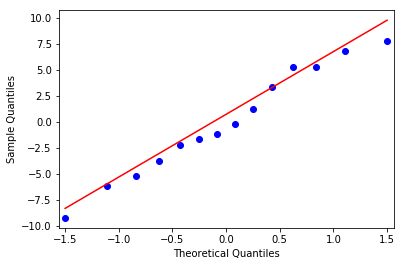

In [32]:
# 정규성 검정
qqplot(reg_result.resid, line="q")
from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis=0)

In [34]:
# Multi Linear Regression Analysis
# "Don't forget" Calculate VIF which indicates the existence of multicollinearity

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE  # Recrusive Factor Elimination << Elminating factors that are not relavant
from sklearn.preprocessing import StandardScaler

In [39]:
bodymass = pd.read_csv("체질검사.csv")

In [40]:
bodymass.head(5)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


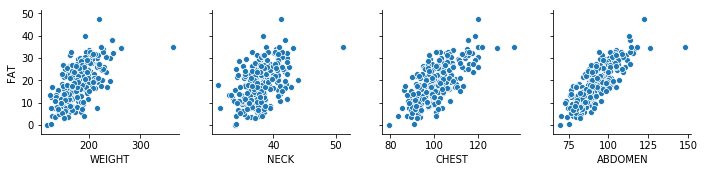

In [44]:
# Scatter plot
    sns.pairplot(bodymass, y_vars="FAT", x_vars=["WEIGHT", "NECK", "CHEST", "ABDOMEN"])

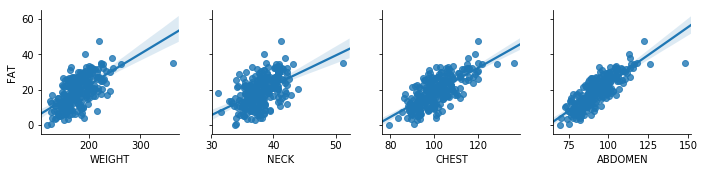

In [45]:
sns.pairplot(bodymass, y_vars="FAT", x_vars=["WEIGHT", "NECK", "CHEST", "ABDOMEN"], kind="reg")

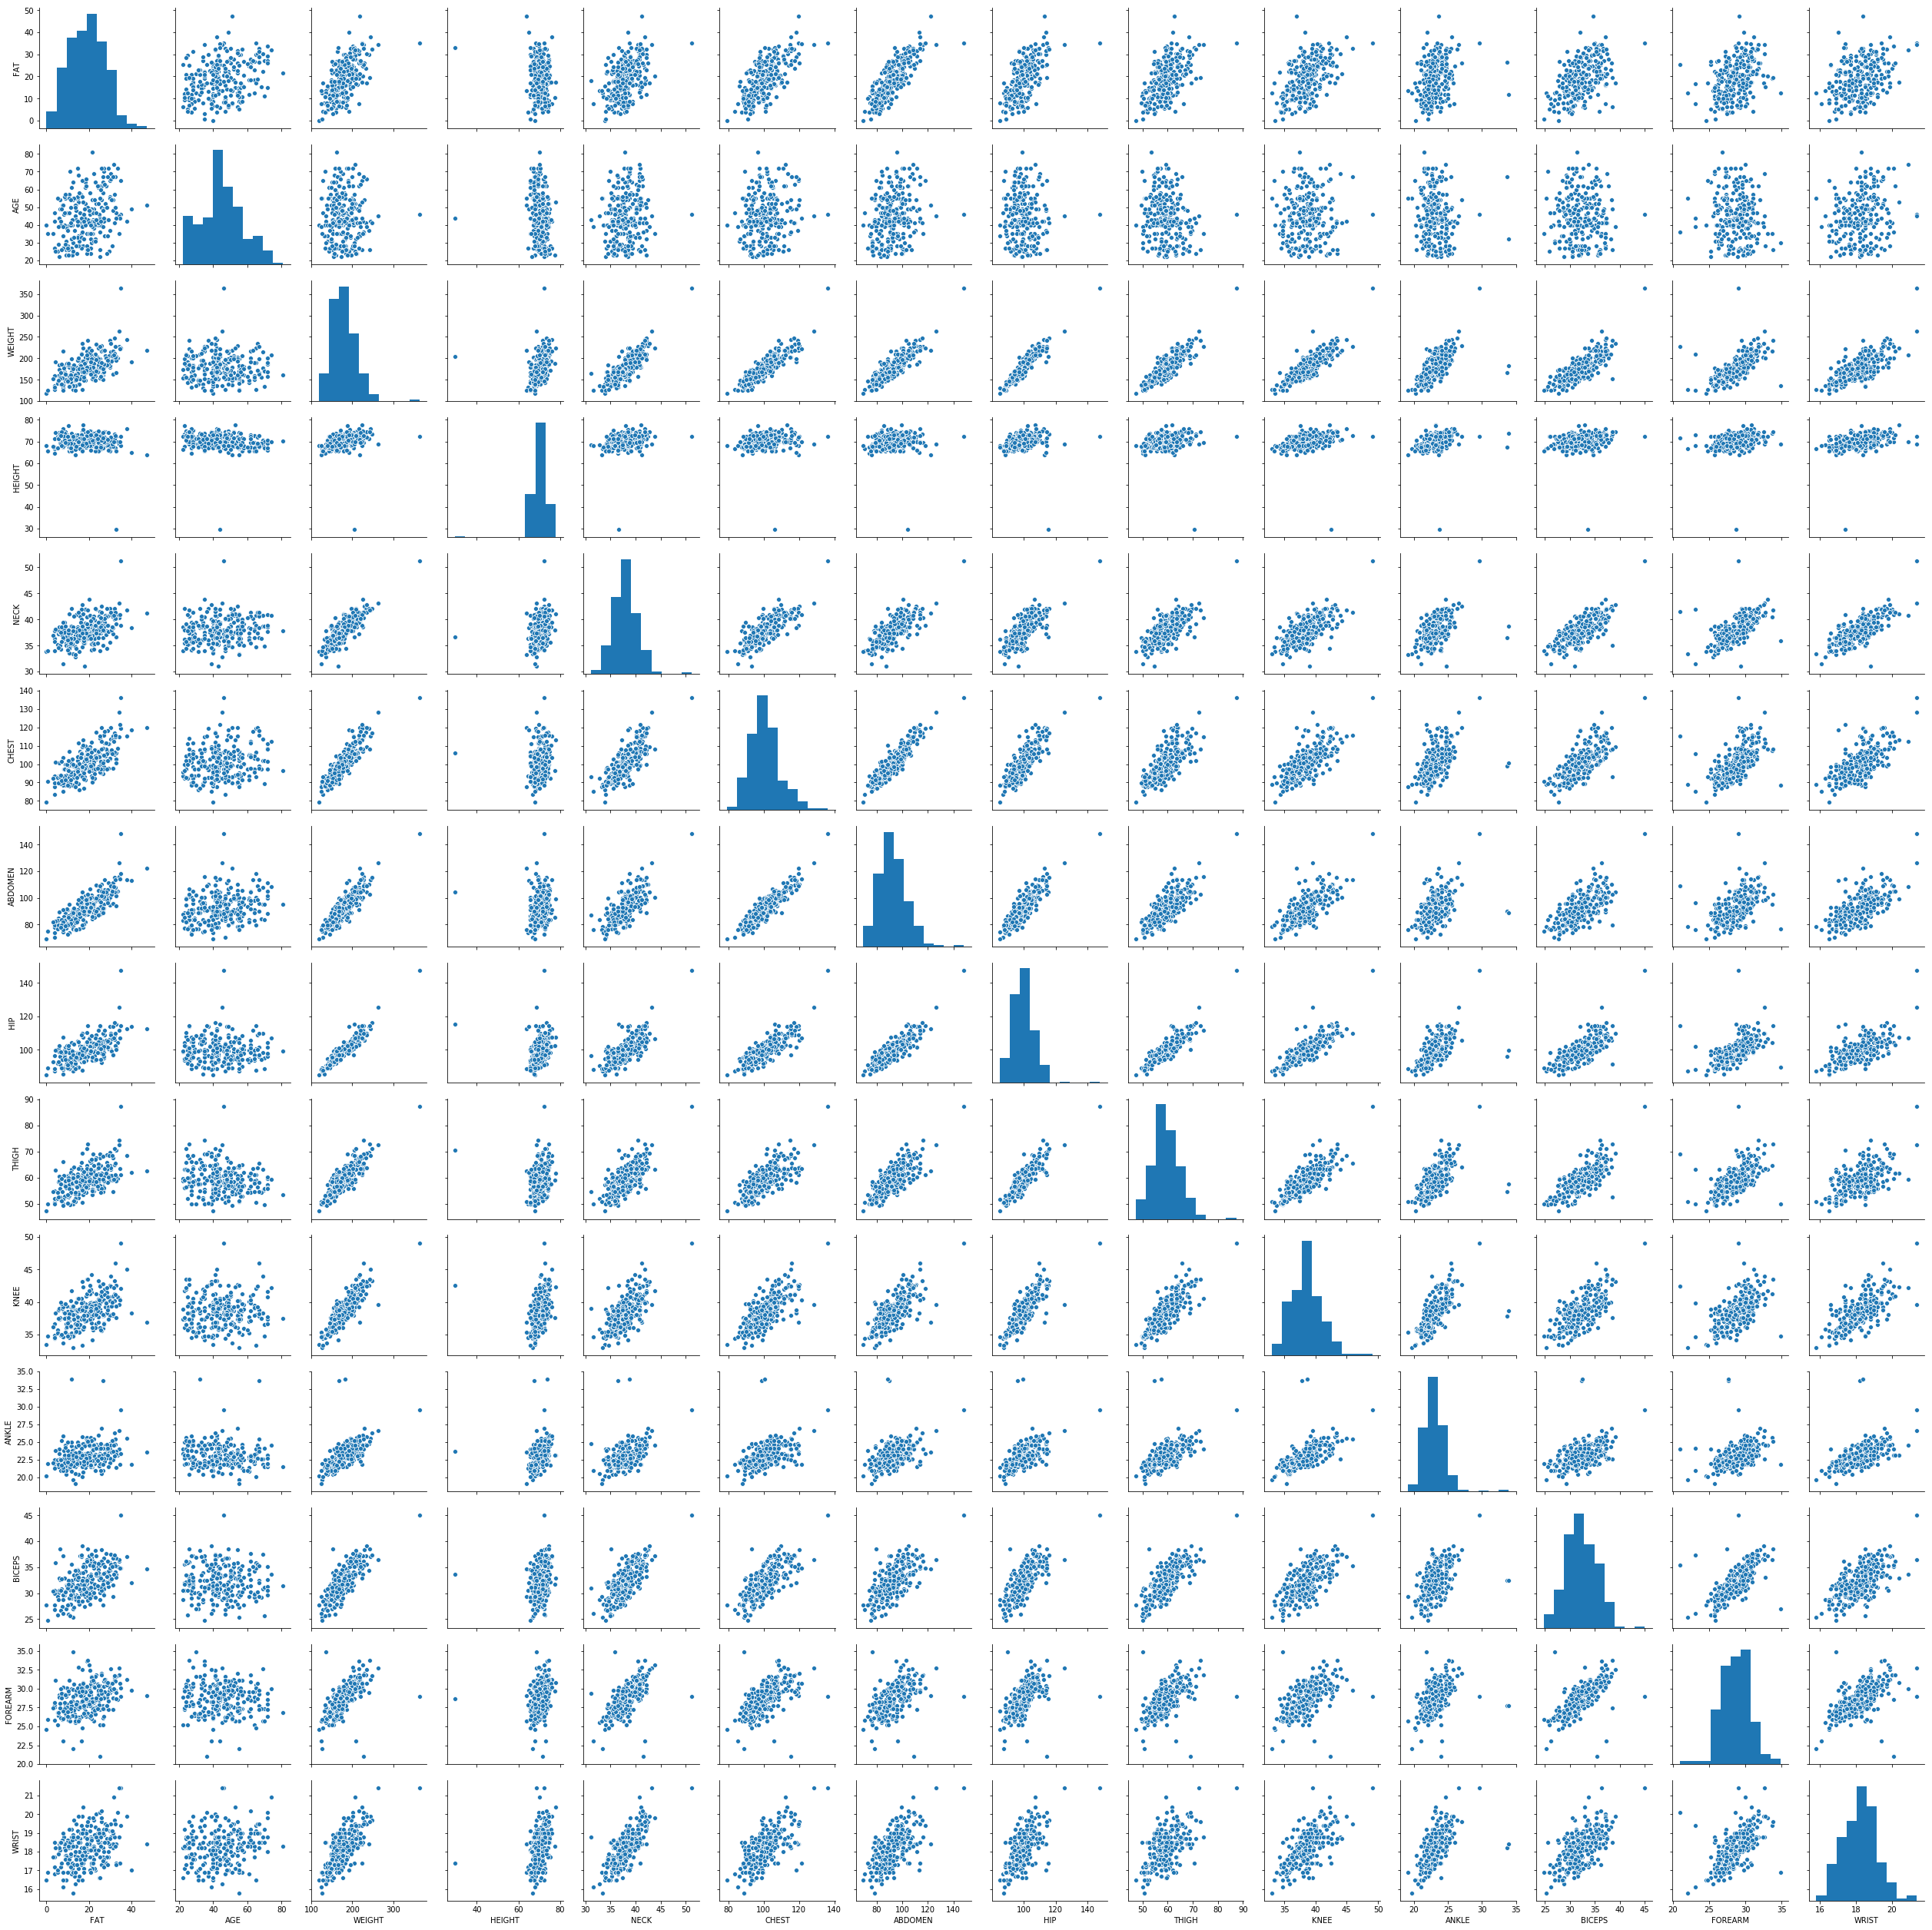

In [48]:
sns.pairplot(bodymass)

In [66]:
bodymass.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665


In [67]:
reg_model = smf.ols(formula = "FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST", data = bodymass)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           7.72e-64
Time:                        11:28:12   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.1885     17.349     -1.048      0.2

In [68]:
# Defining multicollinearity

bodymass_x = bodymass.drop("FAT", axis=1)
bodymass_x_const = add_constant(bodymass_x) # adding statsmodels constant columns
bm_vif = pd.DataFrame()
bm_vif["variable"] = bodymass_x_const.columns
bm_vif["VIF"] = [vif(bodymass_x_const.values, i) for i in range(bodymass_x_const.shape[1])]

# Sorting VIF values

bm_vif.sort_values("VIF", inplace = True)
bm_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
3,HEIGHT,1.675
10,ANKLE,1.908
12,FOREARM,2.192
1,AGE,2.250
13,WRIST,3.378
11,BICEPS,3.620
4,NECK,4.324
9,KNEE,4.612
8,THIGH,7.778
5,CHEST,9.461


In [69]:
bodymass_x_const = bodymass_x_const.drop("WEIGHT", axis=1) 

bm_vif = pd.DataFrame()
bm_vif["variable"] = bodymass_x_const.columns
bm_vif["VIF"] = [vif(bodymass_x_const.values, i) for i in range(bodymass_x_const.shape[1])]

# Sorting VIF values

bm_vif.sort_values("VIF", inplace = True)
bm_vif.round(3)

,variable,VIF
2,HEIGHT,1.330
9,ANKLE,1.844
1,AGE,2.154
11,FOREARM,2.192
12,WRIST,3.309
10,BICEPS,3.507
3,NECK,3.956
8,KNEE,4.312
7,THIGH,7.753
4,CHEST,7.883


In [70]:
bodymass_x_const = bodymass_x_const.drop("ABDOMEN", axis=1) 

bm_vif = pd.DataFrame()
bm_vif["variable"] = bodymass_x_const.columns
bm_vif["VIF"] = [vif(bodymass_x_const.values, i) for i in range(bodymass_x_const.shape[1])]

# Sorting VIF values

bm_vif.sort_values("VIF", inplace = True)
bm_vif.round(3)

,variable,VIF
2,HEIGHT,1.329
1,AGE,1.762
8,ANKLE,1.838
10,FOREARM,2.186
11,WRIST,3.258
9,BICEPS,3.481
3,NECK,3.923
7,KNEE,4.311
4,CHEST,4.883
6,THIGH,7.575


In [74]:
reg_model = smf.ols(formula = "FAT ~ AGE + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST", data = bodymass)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     35.61
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           2.10e-44
Time:                        11:30:07   Log-Likelihood:                -770.51
No. Observations:                 252   AIC:                             1565.
Df Residuals:                     240   BIC:                             1607.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.9228      8.482     -3.292      0.0

In [78]:
# Eliminate Most highest value in T value [ankle]

reg_model = smf.ols(formula = "FAT ~ AGE + HEIGHT + NECK + CHEST + HIP + THIGH + KNEE +  FOREARM + WRIST", data = bodymass)
reg_result = reg_model.fit()


print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     43.87
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           4.84e-46
Time:                        11:39:12   Log-Likelihood:                -770.53
No. Observations:                 252   AIC:                             1561.
Df Residuals:                     242   BIC:                             1596.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.7731      8.271     -3.358      0.0

In [79]:
# Eliminate Most highest value in T value [KNEE]

reg_model = smf.ols(formula = "FAT ~ AGE + HEIGHT + NECK + CHEST + HIP + THIGH + FOREARM + WRIST", data = bodymass)
reg_result = reg_model.fit()


print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     49.48
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           7.52e-47
Time:                        11:39:23   Log-Likelihood:                -770.66
No. Observations:                 252   AIC:                             1559.
Df Residuals:                     243   BIC:                             1591.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.9330      8.253     -3.385      0.0

In [80]:
# Eliminate Most highest value in T value [NECK]

reg_model = smf.ols(formula = "FAT ~ AGE + HEIGHT + CHEST + HIP + THIGH + FOREARM + WRIST", data = bodymass)
reg_result = reg_model.fit()


print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     56.13
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           2.27e-47
Time:                        11:39:38   Log-Likelihood:                -771.56
No. Observations:                 252   AIC:                             1559.
Df Residuals:                     244   BIC:                             1587.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.1636      8.263     -3.408      0.0

In [81]:
# Eliminate Most highest value in T value [FOREARM]

reg_model = smf.ols(formula = "FAT ~ AGE + HEIGHT + CHEST + HIP + THIGH + WRIST", data = bodymass)
reg_result = reg_model.fit()


print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     65.15
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           5.30e-48
Time:                        11:39:50   Log-Likelihood:                -772.27
No. Observations:                 252   AIC:                             1559.
Df Residuals:                     245   BIC:                             1583.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.5494      8.155     -3.256      0.0

In [83]:
# Eliminate Most highest value in T value [HEIGHT]

reg_model = smf.ols(formula = "FAT ~ AGE + CHEST + THIGH + WRIST", data = bodymass)
reg_result = reg_model.fit()


print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     94.89
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           8.95e-49
Time:                        11:40:22   Log-Likelihood:                -775.16
No. Observations:                 252   AIC:                             1560.
Df Residuals:                     247   BIC:                             1578.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.6593      6.569     -4.972      0.0

In [91]:
# Backward Elimination

bodymass_y = bodymass["FAT"]
model = LinearRegression()

rfe = RFE(estimator = model, n_features_to_select=5).fit(bodymass_x, bodymass_y)

selected_cols = bodymass_x.columns[rfe.support_]
removed_cols = bodymass_x.columns[~rfe.support_]

print("Selected Variable : {}".format(selected_cols))
print("Removed Variable : {}".format(removed_cols))


Selected Variable : Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
Removed Variable : Index(['AGE', 'WEIGHT', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


In [93]:
RFE.param()

AttributeError: type object 'RFE' has no attribute 'param'

In [100]:
bodymass.head(1)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4


In [110]:
# Defining multicollinearity

bodymass_adj = bodymass[['FAT', 'NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST']]

bodymass_x = bodymass_adj.drop("FAT", axis=1)
bodymass_x_const = add_constant(bodymass_x) # adding statsmodels constant columns
bm_vif = pd.DataFrame()
bm_vif["variable"] = bodymass_x_const.columns
bm_vif["VIF"] = [vif(bodymass_x_const.values, i) for i in range(bodymass_x_const.shape[1])]

# Sorting VIF values

bm_vif.sort_values("VIF", inplace = True)
bm_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
4,FOREARM,1.769
5,WRIST,2.430
1,NECK,3.565
3,HIP,4.662
2,ABDOMEN,4.818
0,const,509.235


In [112]:
# Eliminate Most highest value in T value [HEIGHT]

reg_model = smf.ols(formula = "FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST", data = bodymass)
reg_result = reg_model.fit()


print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           4.38e-68
Time:                        11:56:33   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

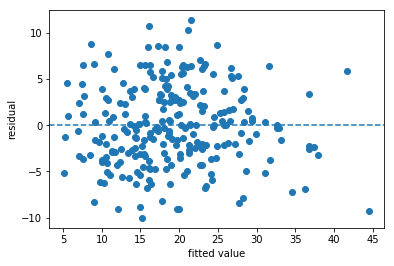

In [113]:
# 등분산성/독립성 검정
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value");plt.ylabel("residual")
plt.axhline(y=0, linestyle="--")

NormaltestResult(statistic=3.6952734095021604, pvalue=0.15760920360555497)

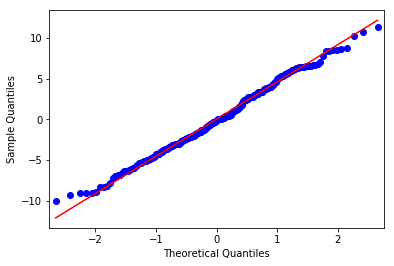

In [114]:
# 정규성 검정
qqplot(reg_result.resid, line="q")
from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis=0)

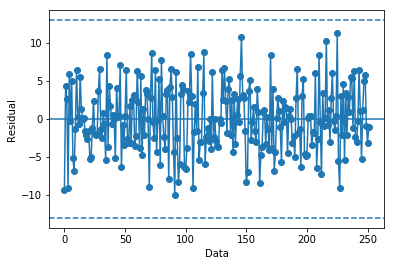

In [120]:
plt.plot(bodymass_adj.index, reg_result.resid, marker="o")
plt.xlabel("Data");plt.ylabel("Residual")
plt.axhline(y=0, linestyle="-")
plt.axhline(y=3*np.std(reg_result.resid), linestyle="--")
plt.axhline(y=-3*np.std(reg_result.resid), linestyle="--")

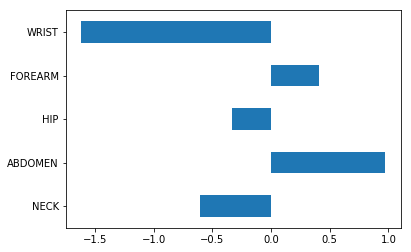

In [122]:
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = False)

In [126]:
scaler = StandardScaler()
cols = bodymass_x.columns

np_scaled = scaler.fit_transform(bodymass_x)
df_scaled=pd.DataFrame(np_scaled, columns = cols)

df_scaled["FAT"] = bodymass["FAT"]
reg_model_scaled = smf.ols(formula="FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST", data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           4.38e-68
Time:                        13:42:42   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.276     69.362      0.0

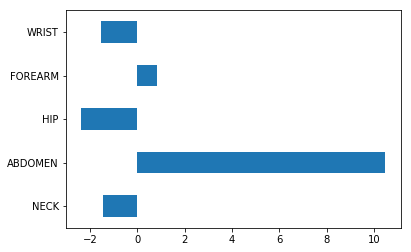

In [128]:
df_reg_coef = pd.DataFrame({"Coef": reg_result_scaled.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = False)

In [129]:
# Scailing 후에 회기계수 크기의 변화

In [142]:
raw = pd.read_csv("DIABETES.csv")

In [143]:
raw.isnull().sum()

Y              0
AGE            0
GENDER         0
BMI            0
BP             0
CHOLESTEROL    0
LDL            0
HDL            0
TCH            0
LTG            0
GLUCOSE        0
dtype: int64

In [144]:
raw.isna().sum()

Y              0
AGE            0
GENDER         0
BMI            0
BP             0
CHOLESTEROL    0
LDL            0
HDL            0
TCH            0
LTG            0
GLUCOSE        0
dtype: int64

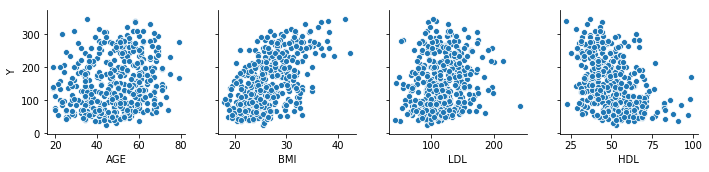

In [145]:
# Scatter plot
sns.pairplot(raw, y_vars="Y", x_vars=["AGE", "BMI", "LDL", "HDL"])

In [149]:
raw.head(3)

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85


In [153]:
raw_nu = raw.drop("GENDER", axis=1)

In [155]:
raw_nu.head(3)

,Y,AGE,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,30.5,93.0,156,93.6,41.0,4.0,4.6728,85


In [156]:
raw_nu.corr().round(3)

,Y,AGE,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
Y,1.000,0.188,0.586,0.441,0.212,0.174,-0.395,0.430,0.566,0.382
AGE,0.188,1.000,0.185,0.335,0.260,0.219,-0.075,0.204,0.271,0.302
BMI,0.586,0.185,1.000,0.395,0.250,0.261,-0.367,0.414,0.446,0.389
BP,0.441,0.335,0.395,1.000,0.242,0.186,-0.179,0.258,0.393,0.390
CHOLESTEROL,0.212,0.260,0.250,0.242,1.000,0.897,0.052,0.542,0.516,0.326
LDL,0.174,0.219,0.261,0.186,0.897,1.000,-0.196,0.660,0.318,0.291
HDL,-0.395,-0.075,-0.367,-0.179,0.052,-0.196,1.000,-0.738,-0.399,-0.274
TCH,0.430,0.204,0.414,0.258,0.542,0.660,-0.738,1.000,0.618,0.417
LTG,0.566,0.271,0.446,0.393,0.516,0.318,-0.399,0.618,1.000,0.465
GLUCOSE,0.382,0.302,0.389,0.390,0.326,0.291,-0.274,0.417,0.465,1.000


### 1. Nominal Variables (?)

In [161]:
import scipy.stats as stats

In [166]:
raw_gender = raw[["Y", "GENDER"]]

In [173]:
print(stats.chi2_contingency(raw_gender)[1])

0.9999995485659615


### 2. VIF

In [174]:
# Defining multicollinearity

raw_nu = raw.drop("Y", axis=1)
raw_nu_const = add_constant(raw_nu) # adding statsmodels constant columns
bm_vif = pd.DataFrame()
bm_vif["variable"] = raw_nu_const.columns
bm_vif["VIF"] = [vif(raw_nu_const.values, i) for i in range(raw_nu_const.shape[1])]

# Sorting VIF values

bm_vif.sort_values("VIF", inplace = True)
bm_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
1,AGE,1.217
2,GENDER,1.278
4,BP,1.459
10,GLUCOSE,1.485
3,BMI,1.509
8,TCH,8.891
9,LTG,10.076
7,HDL,15.402
6,LDL,39.193
5,CHOLESTEROL,59.203


In [179]:
raw_nu_const = raw_nu_const.drop("CHOLESTEROL", axis=1) 

bm_vif = pd.DataFrame()
bm_vif["variable"] = raw_nu_const.columns
bm_vif["VIF"] = [vif(raw_nu_const.values, i) for i in range(raw_nu_const.shape[1])]

# Sorting VIF values

bm_vif.sort_values("VIF", inplace = True)
bm_vif.round(3)

,variable,VIF
1,AGE,1.217
2,GENDER,1.275
4,BP,1.457
9,GLUCOSE,1.484
3,BMI,1.502
8,LTG,2.173
5,LDL,2.927
6,HDL,3.737
7,TCH,7.819
0,const,216.005


In [177]:
reg_model = smf.ols(formula = "Y ~ AGE + GENDER + BP + GLUCOSE + BMI + TCH + LTG + HDL + LDL + CHOLESTEROL", data = raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           3.83e-62
Time:                        14:43:40   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -334.5671     67.455     -4.960      

In [178]:
reg_model = smf.ols(formula = "Y ~ AGE + GENDER + BP + GLUCOSE + BMI + TCH + LTG + HDL + LDL", data = raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     50.71
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           3.06e-62
Time:                        14:43:47   Log-Likelihood:                -2387.8
No. Observations:                 442   AIC:                             4796.
Df Residuals:                     432   BIC:                             4837.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -228.4263     37.972     -6.016      0.0

In [181]:
# Backward Elimination

raw_y = raw["Y"]
model = LinearRegression()

rfe = RFE(estimator = model, n_features_to_select=5).fit(raw_nu, raw_y)

selected_cols = raw_nu.columns[rfe.support_]
removed_cols = raw_nu.columns[~rfe.support_]

print("Selected Variable : {}".format(selected_cols))
print("Removed Variable : {}".format(removed_cols))


Selected Variable : Index(['GENDER', 'BMI', 'BP', 'TCH', 'LTG'], dtype='object')
Removed Variable : Index(['AGE', 'CHOLESTEROL', 'LDL', 'HDL', 'GLUCOSE'], dtype='object')


In [191]:
reg_model = smf.ols(formula = "Y ~ GENDER+BMI+BP+TCH+LTG+HDL+LDL", data = raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     65.17
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           7.99e-64
Time:                        14:49:51   Log-Likelihood:                -2388.4
No. Observations:                 442   AIC:                             4793.
Df Residuals:                     434   BIC:                             4826.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -219.5641     36.939     -5.944      0.0

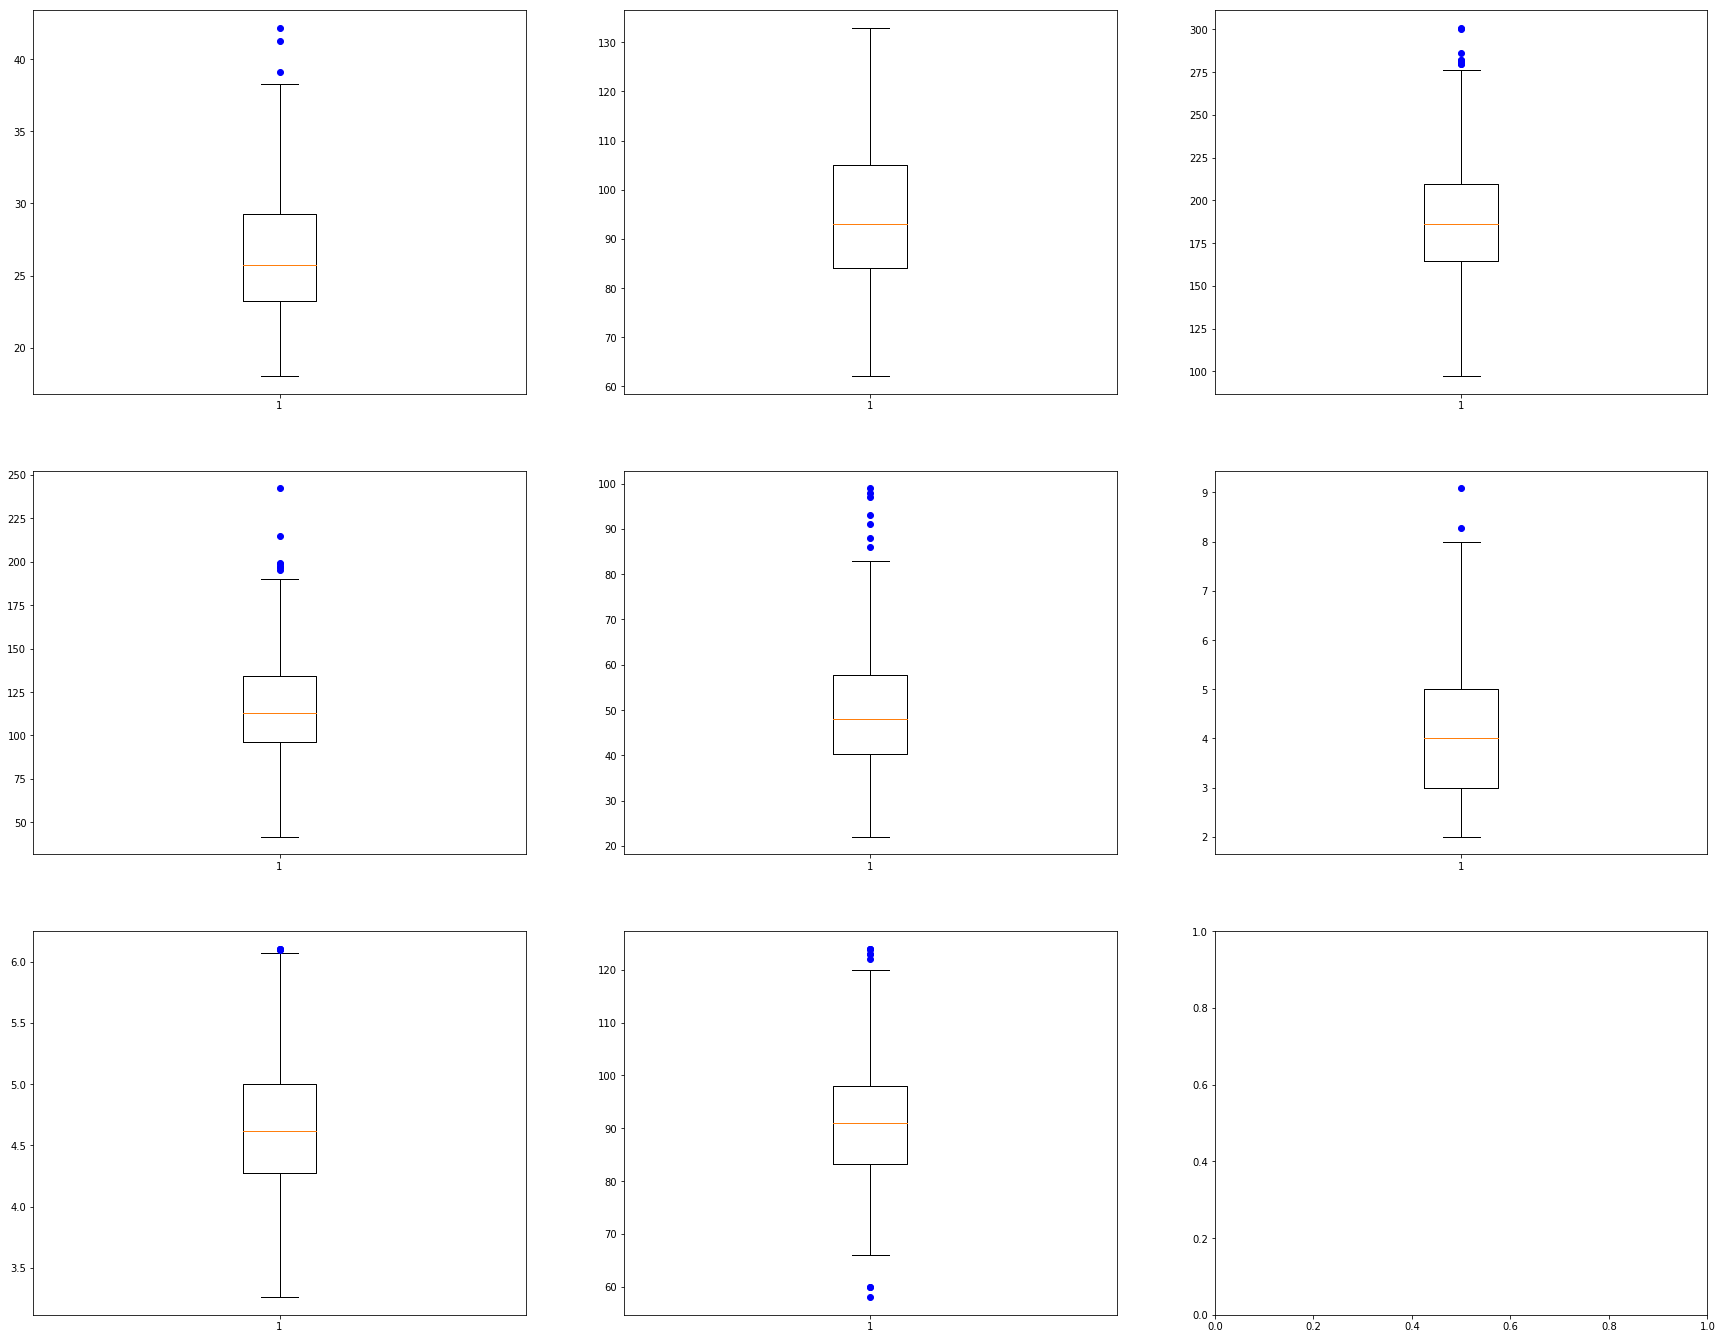

In [192]:
f, ax = plt.subplots(3, 3, figsize=(30, 24))
ax[0, 0].boxplot(raw['BMI'], sym="bo")
ax[0, 1].boxplot(raw['BP'], sym="bo")
ax[0, 2].boxplot(raw['CHOLESTEROL'], sym="bo")
ax[1, 0].boxplot(raw['LDL'], sym="bo")
ax[1, 1].boxplot(raw['HDL'], sym="bo")
ax[1, 2].boxplot(raw['TCH'], sym="bo")
ax[2, 0].boxplot(raw['LTG'], sym="bo")
ax[2, 1].boxplot(raw['GLUCOSE'], sym="bo")
plt.show()

In [193]:
df_BMI_out = 1.5 * raw.describe().round(3)['BMI']['std'] + raw.describe().round(3)['BMI']['75%']
df_CHOLESTEROL_out = 1.5 * raw.describe().round(3)['CHOLESTEROL']['std'] + raw.describe().round(3)['CHOLESTEROL']['75%']
df_LDL_out = 1.5 * raw.describe().round(3)['LDL']['std'] + raw.describe().round(3)['LDL']['75%']
df_HDL_out = 1.5 * raw.describe().round(3)['HDL']['std'] + raw.describe().round(3)['HDL']['75%']
df_TCH_out = 1.5 * raw.describe().round(3)['TCH']['std'] + raw.describe().round(3)['TCH']['75%']
df_LTG_out = 1.5 * raw.describe().round(3)['LTG']['std'] + raw.describe().round(3)['LTG']['75%']

In [194]:
raw[raw['BMI'] > df_BMI_out] = df_BMI_out
raw[raw['CHOLESTEROL'] > df_CHOLESTEROL_out] = df_CHOLESTEROL_out
raw[raw['LDL'] > df_LDL_out] = df_LDL_out
raw[raw['HDL'] > df_HDL_out] = df_HDL_out
raw[raw['TCH'] > df_TCH_out] = df_TCH_out
raw[raw['LTG'] > df_LTG_out] = df_LTG_out

In [198]:
reg_model = smf.ols(formula = "Y ~ GENDER+BMI+BP+TCH+LTG+HDL+LDL", data = raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     112.4
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           2.51e-93
Time:                        15:07:35   Log-Likelihood:                -2349.9
No. Observations:                 442   AIC:                             4716.
Df Residuals:                     434   BIC:                             4749.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -202.0645     43.213     -4.676      0.0

In [200]:
raw.loc[raw["LDL"]]>= 15

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
93.20,False,False,False,False,False,False,False,False,False,False,False
103.20,False,False,False,False,False,False,False,False,False,False,False
93.60,False,False,False,False,False,False,False,False,False,False,False
131.40,False,False,False,False,False,False,False,False,False,False,False
125.40,False,False,False,False,False,False,False,False,False,False,False
64.80,False,False,False,False,False,False,False,False,False,False,False
99.60,False,False,False,False,False,False,False,False,False,False,False
5.78,False,False,False,False,False,False,False,False,False,False,False
119.40,False,False,False,False,False,False,False,False,False,False,False
93.40,False,False,False,False,False,False,False,False,False,False,False


## Regularization
### Ridge Regression

In [207]:
from sklearn.linear_model import Ridge
raw_y = raw["Y"]
raw_X = raw.drop("Y", axis = 1)


clf = Ridge(alpha=1.0)
result = clf.fit(raw_X, raw_y)

ridge = pd.DataFrame()
ridge["variable"] = raw_X.columns
ridge["Coef"] = pd.DataFrame(result.coef_)
ridge.sort_values("Coef")

,variable,Coef
1,GENDER,-22.556239
6,HDL,-0.921037
5,LDL,-0.176078
4,CHOLESTEROL,-0.172075
0,AGE,0.010162
9,GLUCOSE,0.088063
3,BP,1.056290
7,TCH,2.535024
2,BMI,4.996382
8,LTG,53.555672


In [202]:
print(result.intercept_)

-216.96768086358702


In [210]:
raw_y = raw["Y"]
raw_X = raw[['GENDER', 'BMI', 'BP', 'TCH', 'LTG']]


clf = Ridge(alpha=1.0)
result = clf.fit(raw_X, raw_y)

ridge = pd.DataFrame()
ridge["variable"] = raw_X.columns
ridge["Coef"] = pd.DataFrame(result.coef_)
ridge.sort_values("Coef")

,variable,Coef
0,GENDER,-10.565294
2,BP,0.789344
3,TCH,3.492880
1,BMI,4.937982
4,LTG,55.417689


In [211]:
print(result.intercept_)

-308.6676371747792


In [230]:
from sklearn.linear_model import Ridge
raw_y = raw["Y"]
raw_X = raw[['GENDER', 'BMI', 'BP', 'TCH', 'LTG']]

for i in range (1, 100):
    clf = Ridge(alpha=-i)
    result = clf.fit(raw_X, raw_y)
    
    ridge = pd.DataFrame()
    ridge["variable"] = raw_X.columns
    ridge["Coef"] = pd.DataFrame(result.coef_)
    ridge.sort_values("Coef")
    print(-i, result.intercept_)

-1 -314.337928331761
-2 -317.3283744388867
-3 -320.4304689091499
-4 -323.6509055496656
-5 -326.99692374936564
-6 -330.47636511196947
-7 -334.0977372866579
-8 -337.8702860864116
-9 -341.8040771767605
-10 -345.91008884970176
-11 -350.2003176778344
-12 -354.6878991838062
-13 -359.3872460744145
-14 -364.31420709561775
-15 -369.4862501879303
-16 -374.92267439155046
-17 -380.6448559065848
-18 -386.67653490716026
-19 -393.04415120651424
-20 -399.77723876233165
-21 -406.90889141618254
-22 -414.4763153368741
-23 -422.52148759980844
-24 -431.0919454761631
-25 -440.24173773035557
-26 -450.0325780924188
-27 -460.53525287067544
-28 -471.8313505165081
-29 -484.0154024511005
-30 -497.19755394581557
-31 -511.5069247494836
-32 -527.0958766133884
-33 -544.1454866746955
-34 -562.8726438565601
-35 -583.5393589457458
-36 -606.4651381459378
-37 -632.0436643643932
-38 -660.7656436247709
-39 -693.2506493478888
-40 -730.2923892628585
-41 -772.9244943542946
-42 -822.5185713955732
-43 -880.934621534361
-44 -950.

In [235]:
raw_y = raw["Y"]
raw_X = raw[['GENDER', 'BMI', 'BP', 'TCH', 'LTG']]


clf = Ridge(alpha=-54.0)
result = clf.fit(raw_X, raw_y)

ridge = pd.DataFrame()
ridge["variable"] = raw_X.columns
ridge["Coef"] = pd.DataFrame(result.coef_)
ridge.sort_values("Coef")

,variable,Coef
0,GENDER,-2998.703885
3,TCH,-2810.688693
1,BMI,-154.014649
2,BP,-13.650992
4,LTG,12042.850390


In [236]:
print(result.intercept_)

-34371.83906892196


### Lasso Regression

In [238]:
from sklearn import linear_model

raw_y = raw["Y"]
raw_X = raw[['GENDER', 'BMI', 'BP', 'TCH', 'LTG']]

clf = linear_model.Lasso(alpha=0.1)
result = clf.fit(raw_X, raw_y)

LASSO = pd.DataFrame()
LASSO["variable"] = raw_X.columns
LASSO["Coef"] = pd.DataFrame(result.coef_)
LASSO.sort_values("Coef")


,variable,Coef
0,GENDER,-10.331227
2,BP,0.792697
3,TCH,3.229874
1,BMI,4.957914
4,LTG,55.653293


In [239]:
print(result.intercept_)

-309.9079948021546


In [259]:
for i in range (0, 9):
    clf = linear_model.Lasso(alpha=(0.1+(i/10)))
    result = clf.fit(raw_X, raw_y)

    LASSO = pd.DataFrame()
    LASSO["variable"] = raw_X.columns
    LASSO["Coef"] = pd.DataFrame(result.coef_)
    LASSO.sort_values("Coef")
    print("%.1f, %f" % (0.1+(i/10), result.intercept_))

0.1, -309.907995
0.2, -308.363923
0.3, -306.819894
0.4, -305.276094
0.5, -303.732228
0.6, -302.188430
0.7, -300.644631
0.8, -299.100826
0.9, -297.557028
